<ipython-input-3-eb7e292aad8b>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  cf = read_html(ols('Income ~ Seniority + Education', data = dados).fit().summary().tables[1].as_html(), header = 0, index_col = 0)[0]


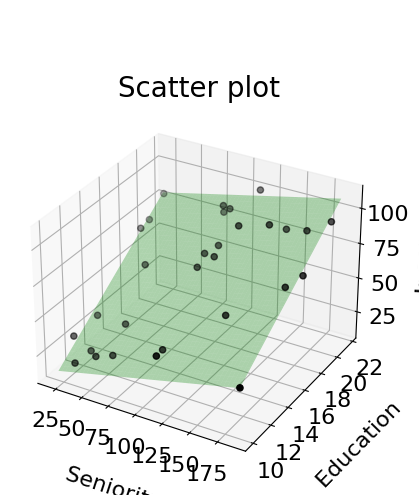

In [ ]:
from pandas import DataFrame, read_html
from statsmodels.formula.api import ols
from numpy import arange, meshgrid
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Dados
dados = DataFrame({'Education': [21.5862068965517, 18.2758620689655, 12.0689655172414, 17.0344827586207, 19.9310344827586, 18.2758620689655, 19.9310344827586, 21.1724137931034, 20.3448275862069, 10, 13.7241379310345, 18.6896551724138, 11.6551724137931, 16.6206896551724, 10, 20.3448275862069, 14.1379310344828, 16.6206896551724, 16.6206896551724, 20.3448275862069, 18.2758620689655, 14.551724137931, 17.448275862069, 10.4137931034483, 21.5862068965517, 11.2413793103448, 19.9310344827586, 11.6551724137931, 12.0689655172414, 17.0344827586207],
                   'Seniority': [113.103448275862, 119.310344827586, 100.689655172414, 187.586206896552, 20, 26.2068965517241, 150.344827586207, 82.0689655172414, 88.2758620689655, 113.103448275862, 51.0344827586207, 144.137931034483, 20, 94.4827586206897, 187.586206896552, 94.4827586206897, 20, 44.8275862068966, 175.172413793103, 187.586206896552, 100.689655172414, 137.931034482759, 94.4827586206897, 32.4137931034483, 20, 44.8275862068966, 168.965517241379, 57.2413793103448, 32.4137931034483, 106.896551724138],
                   'Income': [99.9171726114381, 92.579134855529, 34.6787271520874, 78.7028062353695, 68.0099216471551, 71.5044853814318, 87.9704669939115, 79.8110298331255, 90.00632710858, 45.6555294997364, 31.9138079371295, 96.2829968022869, 27.9825049000603, 66.601792415137, 41.5319924201478, 89.00070081522, 28.8163007592387, 57.6816942573605, 70.1050960424457, 98.8340115435447, 74.7046991976891, 53.5321056283034, 72.0789236655191, 18.5706650327685, 78.8057842852386, 21.388561306174, 90.8140351180409, 22.6361626208955, 17.613593041445, 74.6109601985289]
                  })

# Variáveis
y = dados.Income
x1 = dados.Seniority
x2 = dados.Education

# Coeficientes
cf = read_html(ols('Income ~ Seniority + Education', data = dados).fit().summary().tables[1].as_html(), header = 0, index_col = 0)[0]
b0 = cf['coef'].values[0]
b1 = cf['coef'].values[1]
b2 = cf['coef'].values[2]

# Plano estimado
X1 = arange(start = min(x1), stop = max(x1), step = 0.1)
X2 = arange(start = min(x2), stop = max(x2), step = 0.1)
X1, X2 = meshgrid(X1, X2)
Y_hat = b0 + b1 * X1 + b2 * X2

# Scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X1, X2, Y_hat, alpha = 0.3, color = "green", shade = False)
ax.scatter(x1, x2, y,  color = 'black')
ax.set_title(label = '\n \n Scatter plot', fontsize = 20)
ax.set_xlabel(xlabel = '\n \n Seniority', fontsize = 16)
ax.set_ylabel(ylabel = '\n \n Education', fontsize = 16)
ax.set_zlabel(zlabel = '\n Income', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
font = {'size': 16}
ax.tick_params('z', labelsize = font['size'])

# Roll
def animate_3(i):
    ax.view_init(roll = i)


ani_3 = FuncAnimation(fig, animate_3, frames = 300)
ani_3.save("scatter_plot_3D_Python_3.gif", dpi = 200, writer = PillowWriter(fps = 25))

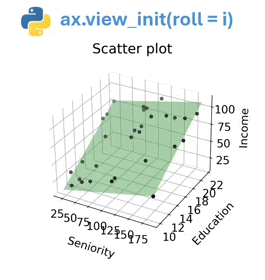